Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Alexey Adamsky"

# Assignment 2 - Time Series Analysis
**(30 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

2. *(4 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. 

3. *(6 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(6 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(8 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(6 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `yfinance`.

---------

### Import all the relevant libraries and follow the examples below for importing data.

In [ ]:
# import yfinance as yf
# from pandas_datareader import data as pdr
# import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like
# from datetime import datetime
# import pandas_datareader.data as web

: 

In [18]:
# # Option 1) Using pandas datareader and Yahoo Finance
# yf.pdr_override()

# start = datetime(2018, 11, 20)

# amzn = pdr.get_data_yahoo('AMZN', start = start)

[*********************100%***********************]  1 of 1 completed


## Question 1.

Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

In [ ]:
pip install yfinance

In [ ]:
pip install pandas-datareader

In [5]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from datetime import datetime
import pandas_datareader.data as web

## Question 2. *(4 points)*

Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months.

In [6]:
start = datetime(2018, 11, 20)

In [7]:
all_stocks_list = ['META', 'MMM', 'IBM', 'AMZN']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [8]:
stocks = all_stocks["Adj Close"]

In [9]:
stocks.describe()

,AMZN,IBM,META,MMM
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,128.811013,115.226477,229.627982,155.493941
std,33.796105,12.092913,68.857095,19.936880
min,67.197998,78.906227,88.910004,106.275589
25%,93.486748,106.900265,178.180000,143.013374
50%,127.510002,113.253258,209.529999,152.812683
75%,161.171501,125.493889,277.865005,171.042648
max,186.570496,149.100006,382.179993,194.587616


In [10]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011 entries, 2018-11-20 to 2022-11-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1011 non-null   float64
 1   IBM     1011 non-null   float64
 2   META    1011 non-null   float64
 3   MMM     1011 non-null   float64
dtypes: float64(4)
memory usage: 39.5 KB


In [11]:
stocks.head(10)

,AMZN,IBM,META,MMM
Date,,,,
2018-11-20,74.773003,92.153252,132.429993,172.705139
2018-11-21,75.836502,93.230476,134.820007,172.306244
2018-11-23,75.102997,92.145393,131.729996,170.667175
2018-11-26,79.066498,94.008896,136.380005,173.320862
2018-11-27,79.070999,94.378448,135.000000,174.040665
2018-11-28,83.887497,96.713730,136.759995,177.205978
2018-11-29,83.678497,95.518562,138.679993,177.396774
2018-11-30,84.508499,97.712318,140.610001,180.310608
2018-12-03,88.617996,98.530060,141.089996,181.039047


## Question 3. *(6 points)*

Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

In [12]:
stocks = stocks.resample('BM').last()

In [13]:
stocks.head()

,AMZN,IBM,META,MMM
Date,,,,
2018-11-30,84.508499,97.712318,140.610001,180.310608
2018-12-31,75.098503,89.377647,131.089996,165.238464
2019-01-31,85.936501,105.693161,166.690002,173.702454
2019-02-28,81.991501,109.875748,161.449997,181.094421
2019-03-29,89.037498,112.238235,166.690002,181.434982


## Question 4. *(6 points)*

Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
- Are they autocorrelated?
- Provide short explanation.

In [14]:
# 'META', 'MMM', 'IBM', 'AMZN'

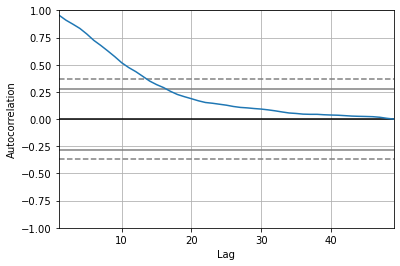

In [24]:
pd.plotting.autocorrelation_plot(stocks);

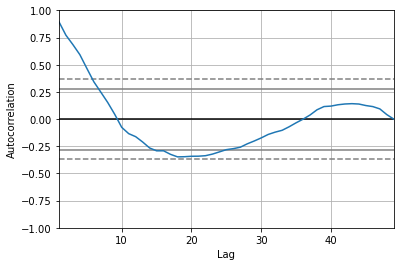

In [25]:
pd.plotting.autocorrelation_plot(stocks['META']);

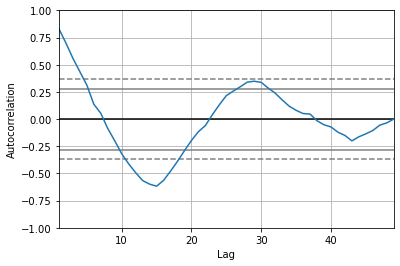

In [26]:
pd.plotting.autocorrelation_plot(stocks['MMM']);

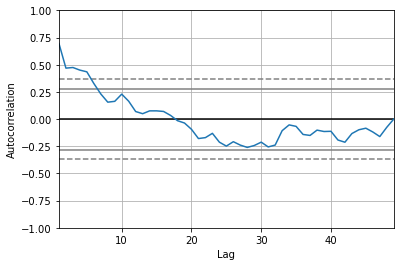

In [27]:
pd.plotting.autocorrelation_plot(stocks['IBM']);

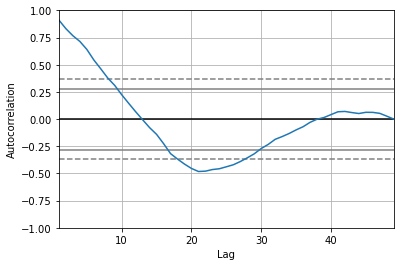

In [28]:
pd.plotting.autocorrelation_plot(stocks['AMZN']);

In [34]:
# We can clearly see that our time series are non-stationary

In [35]:
# stocks['META'].info()

In [36]:
# metaDf = stocks['META'].to_frame(name='price')

In [37]:
# metaDf.head()

In [38]:
# metaDf.unstack() #[metaDf['Date'] >= datetime(2019, 1, 1)]

In [39]:
# metaSason = metaDf.pivot_table(values='price', aggfunc='max',index=metaDf.index.month, columns=metaDf.index.year)


In [40]:
# metaSason = metaSason.T.dropna().T

In [41]:
# metaSason

In [42]:
# metaSason.plot(style='-',title='Meta - Seasonal Trends',figsize=(10,8));

## Question 5 *(8 points)*

- Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function.
- Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
- Are the returns autocorrelated? Provide short explanation.

In [29]:
stocks.head()

,AMZN,IBM,META,MMM
Date,,,,
2018-11-30,84.508499,97.712318,140.610001,180.310608
2018-12-31,75.098503,89.377647,131.089996,165.238464
2019-01-31,85.936501,105.693161,166.690002,173.702454
2019-02-28,81.991501,109.875748,161.449997,181.094421
2019-03-29,89.037498,112.238235,166.690002,181.434982


In [32]:
monthly_returns = stocks - stocks.shift(1)

In [49]:
monthly_returns = monthly_returns.iloc[1:]

In [50]:
monthly_returns.head()

,AMZN,IBM,META,MMM
Date,,,,
2018-12-31,-9.409996,-8.334671,-9.520004,-15.072144
2019-01-31,10.837997,16.315514,35.600006,8.463989
2019-02-28,-3.945000,4.182587,-5.240005,7.391968
2019-03-29,7.045998,2.362488,5.240005,0.340561
2019-04-30,7.288498,-0.660225,26.709991,-15.953522


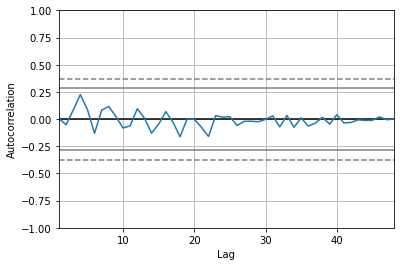

In [51]:
pd.plotting.autocorrelation_plot(monthly_returns);

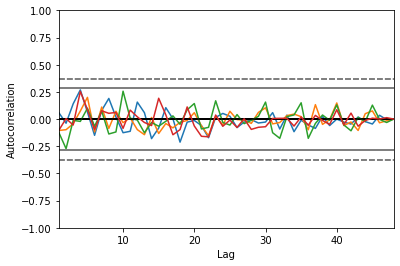

In [52]:
pd.plotting.autocorrelation_plot(monthly_returns['META']);
pd.plotting.autocorrelation_plot(monthly_returns['MMM']);
pd.plotting.autocorrelation_plot(monthly_returns['IBM']);
pd.plotting.autocorrelation_plot(monthly_returns['AMZN']);

In [53]:
# we can see that the profit time series are stationary
# meaning there is not seasonality and the all share the same mean

## Question 6 *(6 points)*

- Combine all 4 time series (returns) into a single DataFrame,
- Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
- Explain the results. Is there any correlation?

In [55]:
monthly_returns.corr()

,AMZN,IBM,META,MMM
AMZN,1.000000,0.070019,0.469273,0.332184
IBM,0.070019,1.000000,0.395805,0.534449
META,0.469273,0.395805,1.000000,0.485695
MMM,0.332184,0.534449,0.485695,1.000000


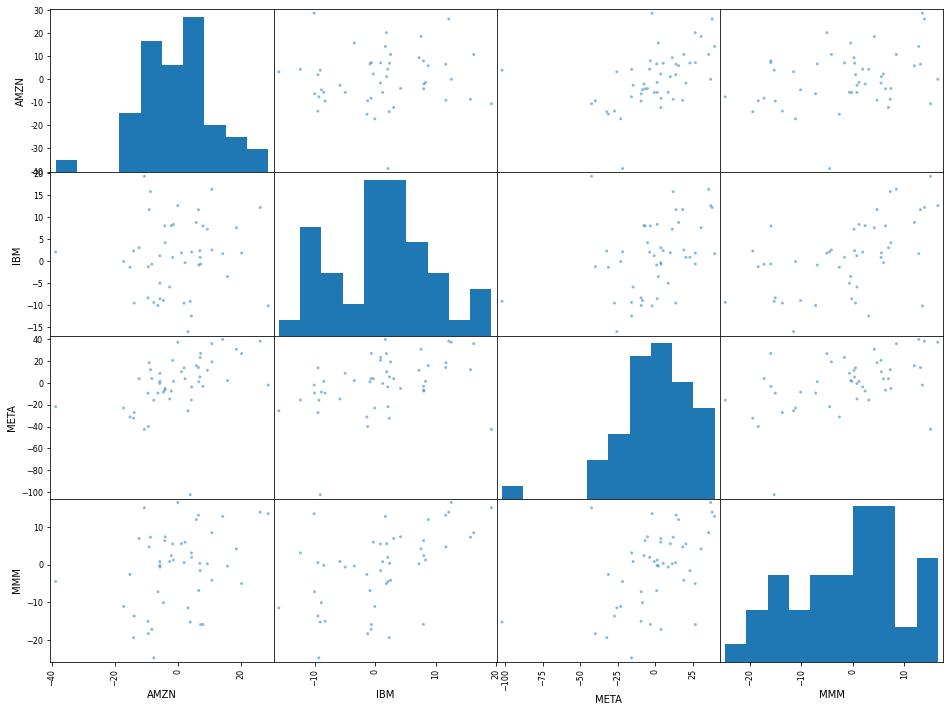

In [60]:
pd.plotting.scatter_matrix(monthly_returns, figsize=(16, 12));

In [61]:
# from this graph we can see a few things:
# - META & AMZN seem to have some positive correlation.
#   As AMZN prices go do META
# - Similar correlation we see between IBM & META and IBM & MMM